In [1]:
import pandas as pd
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

In [3]:
labeled_images = pd.read_csv('C:/Users/Morien/Downloads/all_2/train.csv')#C:\Users\Morien\Downloads\all_2

In [53]:
images = labeled_images.iloc[:,1:]
labels = labeled_images.iloc[:,:1]
train_images, test_images,train_labels, test_labels = train_test_split(images, labels, train_size=0.8, random_state=0)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


Text(0.5,1,'1')

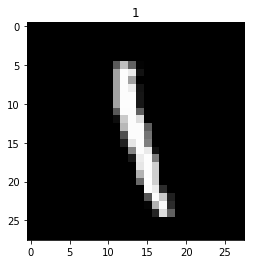

In [13]:
i=4
img=train_images.iloc[i].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train_labels.iloc[i,0])

(array([719.,   5.,   0.,   8.,   4.,   1.,   8.,   4.,   6.,  29.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

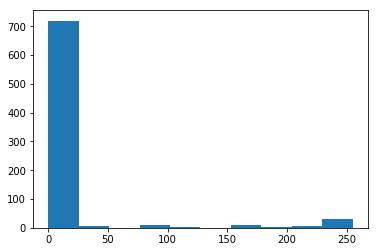

In [14]:
plt.hist(train_images.iloc[i])

In [18]:
clf = svm.SVC()
clf.fit(train_images, train_labels.values.ravel())
clf.score(test_images,test_labels)

0.1

In [ ]:
#using polynomial kernal
#Intuitively, the polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of these.
#as the varable when combined form a number
clf1 = svm.SVC(kernel ='poly',decision_function_shape ='ovo')
clf1.fit(train_images, train_labels.values.ravel())
clf1.score(test_images,test_labels)

In [58]:
#since the accuracy is high using the whoel data to train
clf1 = svm.SVC(kernel ='poly',decision_function_shape ='ovo')
clf1.fit(images, labels.values.ravel())


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
test_data=pd.read_csv('C:/Users/Morien/Downloads/all_2/test.csv')
#test_data[test_data>0]=1
results=clf1.predict(test_data)

In [56]:
results

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [60]:
df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('C:/Users/Morien/Downloads/all_2/results.csv', header=True)